In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

In [2]:
headlist=['age','workclass','final_weight','education','education_num','marital-status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_perweek','native_country','Income']
dataset=pd.read_csv(r'C:\Users\pc\Desktop\4-机器学习-code\census_income\adult.data',header=None,names=headlist)
dataset_=pd.read_csv(r'C:\Users\pc\Desktop\4-机器学习-code\census_income\adult.test',header=None,names=headlist)
#train_count=dataset.shape[0]
#print(train_count)
#dataset=pd.concat([dataset,dataset_])

In [3]:
dataset=dataset.applymap(lambda x:np.nan if x==' ?' else x).dropna()
order=['age','final_weight','education_num','capital_gain','capital_loss','hours_perweek','workclass','education','marital-status','occupation','relationship','race','sex','native_country','Income']
dataset=dataset[order]
print(dataset.shape[0])
dataset_=dataset_.applymap(lambda x:np.nan if x==' ?' else x).dropna()
order=['age','final_weight','education_num','capital_gain','capital_loss','hours_perweek','workclass','education','marital-status','occupation','relationship','race','sex','native_country','Income']
dataset_=dataset_[order]
#dataset_.info()

30162


In [4]:
dataset1=dataset.copy()
dataset=pd.concat([dataset,dataset_]).reset_index().drop('index',axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
age               45222 non-null object
final_weight      45222 non-null float64
education_num     45222 non-null float64
capital_gain      45222 non-null float64
capital_loss      45222 non-null float64
hours_perweek     45222 non-null float64
workclass         45222 non-null object
education         45222 non-null object
marital-status    45222 non-null object
occupation        45222 non-null object
relationship      45222 non-null object
race              45222 non-null object
sex               45222 non-null object
native_country    45222 non-null object
Income            45222 non-null object
dtypes: float64(5), object(10)
memory usage: 5.2+ MB


## 1. 分类练习
对census_income数据集进行预处理（包括但不限于填充缺失值、数据标准化、标称数据编码）。  
以最后一列“>50K”为正类，“<=50K”为负类，选择至少4中分类模型进行建模，并进行结果评估和比较。

http://archive.ics.uci.edu/ml/datasets/Census+Income 

预处理：

In [5]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
final_weight      30162 non-null int64
education_num     30162 non-null int64
capital_gain      30162 non-null int64
capital_loss      30162 non-null int64
hours_perweek     30162 non-null int64
workclass         30162 non-null object
education         30162 non-null object
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
native_country    30162 non-null object
Income            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
def min_max(x):
    result=(x-np.min(x))/(np.max(x)-np.min(x))
    return result
dataset1.age=(dataset1.age-dataset1.age.min())/(dataset1.age.max()-dataset1.age.min())
dataset1.final_weight=(dataset1.final_weight-dataset1.final_weight.min())/(dataset1.final_weight.max()-dataset1.final_weight.min())
dataset1.education_num=(dataset1.education_num-dataset1.education_num.min())/(dataset1.education_num.max()-dataset1.education_num.min())
dataset1.capital_gain=(dataset1.capital_gain-dataset1.capital_gain.min())/(dataset1.capital_gain.max()-dataset1.capital_gain.min())
dataset1.capital_loss=(dataset1.capital_loss-dataset1.capital_loss.min())/(dataset1.capital_loss.max()-dataset1.capital_loss.min())
dataset1.hours_perweek=(dataset1.hours_perweek-dataset1.hours_perweek.min())/(dataset1.hours_perweek.max()-dataset1.hours_perweek.min())

dataset1.head()

,age,final_weight,education_num,capital_gain,capital_loss,hours_perweek,workclass,education,marital-status,occupation,relationship,race,sex,native_country,Income
0,0.301370,0.043338,0.800000,0.02174,0.0,0.397959,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,0.452055,0.047277,0.800000,0.00000,0.0,0.122449,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,0.287671,0.137244,0.533333,0.00000,0.0,0.397959,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,0.493151,0.150212,0.400000,0.00000,0.0,0.397959,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,0.150685,0.220703,0.800000,0.00000,0.0,0.397959,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [7]:
dataset_1=dataset.iloc[:,:6]
#dataset_1
dataset_2=dataset.iloc[:,6:]
#dataset_2

进行标称数据编码

In [8]:
workclass_dic=dataset_2['workclass'].unique().tolist()
education_dic=dataset_2['education'].unique().tolist()
MA_dic=dataset_2['marital-status'].unique().tolist()
occupation_dic=dataset_2['occupation'].unique().tolist()
relationship_dic=dataset_2['relationship'].unique().tolist()
race_dic=dataset_2['race'].unique().tolist()
sex_dic=dataset_2['sex'].unique().tolist()
country_dic=dataset_2['native_country'].unique().tolist()
income_dic=dataset_2['Income'].unique().tolist()

In [9]:
enc=preprocessing.OneHotEncoder(categories=[workclass_dic,education_dic,MA_dic,occupation_dic,\
                                          relationship_dic,race_dic,sex_dic,country_dic,income_dic])
fit_array=[[' State-gov',' Bachelors',' Never-married',' Adm-clerical',' Not-in-family',' White',' Male',' United-States',' <=50K']]
enc.fit(fit_array)

OneHotEncoder(categories=[[' State-gov', ' Self-emp-not-inc', ' Private',
                           ' Federal-gov', ' Local-gov', ' Self-emp-inc',
                           ' Without-pay'],
                          [' Bachelors', ' HS-grad', ' 11th', ' Masters',
                           ' 9th', ' Some-college', ' Assoc-acdm', ' 7th-8th',
                           ' Doctorate', ' Assoc-voc', ' Prof-school',
                           ' 5th-6th', ' 10th', ' Preschool', ' 12th',
                           ' 1st-4th'],
                          [' Never-married', ' Married-civ-spouse', ' Divorced',
                           ' Married...
                          [' United-States', ' Cuba', ' Jamaica', ' India',
                           ' Mexico', ' Puerto-Rico', ' Honduras', ' England',
                           ' Canada', ' Germany', ' Iran', ' Philippines',
                           ' Poland', ' Columbia', ' Cambodia', ' Thailand',
                           ' Ecuador', ' Laos

In [10]:
enc.transform(dataset_2).toarray()


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

感觉上面那个还要自己再重新设计一遍变量的名称，不太好用

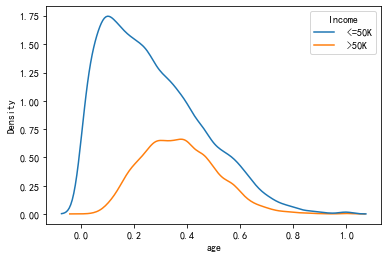

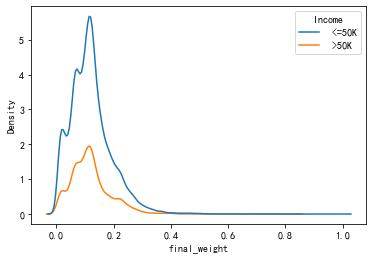

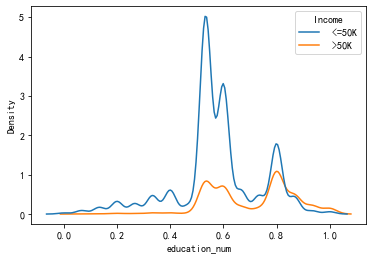

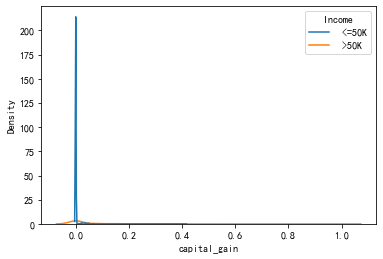

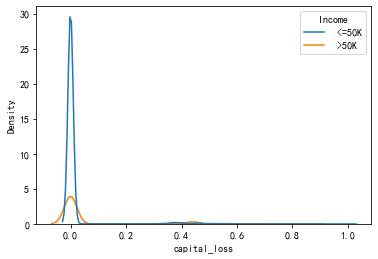

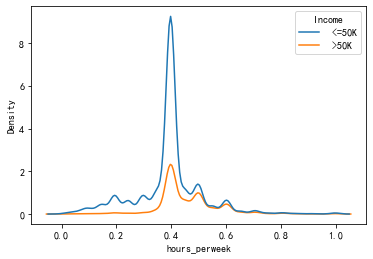

In [11]:
alist=['age','final_weight','education_num','capital_gain','capital_loss','hours_perweek']
for i in alist:
    sns.kdeplot(x=i,data=dataset1,hue='Income')
    plt.show()


Z-score标准化处理的数据：dataset2;
未标准化处理的数据：dataset1

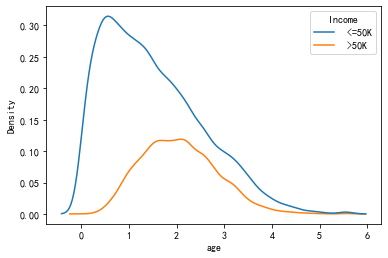

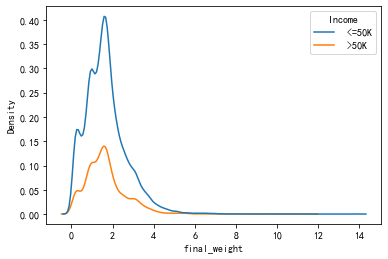

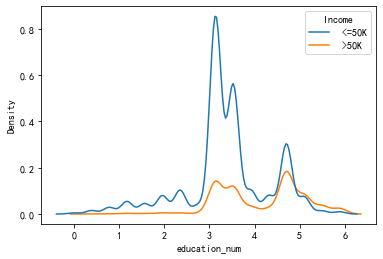

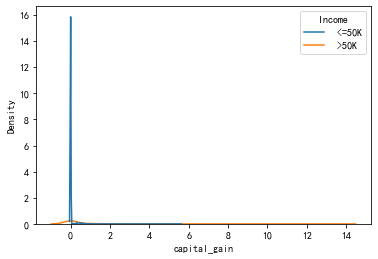

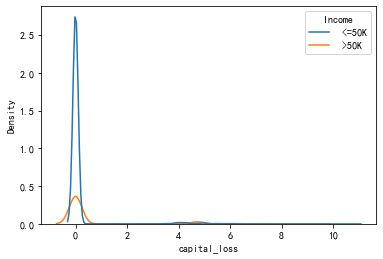

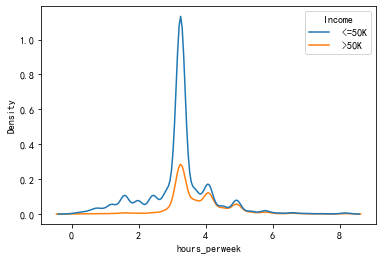

In [12]:
dataset2=dataset1.copy()
dataset2.age=(dataset2.age-dataset2.age.min())/(dataset2.age.std())
dataset2.final_weight=(dataset2.final_weight-dataset2.final_weight.min())/(dataset2.final_weight.std())
dataset2.education_num=(dataset2.education_num-dataset2.education_num.min())/(dataset2.education_num.std())
dataset2.capital_gain=(dataset2.capital_gain-dataset2.capital_gain.min())/(dataset2.capital_gain.std())
dataset2.capital_loss=(dataset2.capital_loss-dataset2.capital_loss.min())/(dataset2.capital_loss.std())
dataset2.hours_perweek=(dataset2.hours_perweek-dataset2.hours_perweek.min())/(dataset2.hours_perweek.std())
for i in alist:
    sns.kdeplot(x=i,data=dataset2,hue='Income')
    plt.show()

### 下面使用新的方法进行One-hot编码
这个创建虚拟变量的方法貌似并不会自动去除一个维度

In [22]:
#比如‘race’这个字段
dataset_2['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [23]:
#这块用个循环可能会更好
dataset_3=dataset_2.copy()
#性别
dataset_3.sex=dataset_3.sex.apply(lambda x:1 if x==' Male' else 0)
#收入
dataset_3.Income=dataset_3.Income.apply(lambda x:1 if (x==' >50K' or x==' >50K.') else 0)

#种族
raceDF=pd.DataFrame()
raceDF=pd.get_dummies(dataset_3['race'],prefix='race')
#workclass
workclassDF=pd.DataFrame
workclassDF=pd.get_dummies(dataset_3['workclass'],prefix='workclass')
workclassDF.head()
#education
educationDF=pd.DataFrame
educationDF=pd.get_dummies(dataset_3['education'],prefix='education')
educationDF.head()
#MS
MSDF=pd.DataFrame
MSDF=pd.get_dummies(dataset_3['marital-status'],prefix='marital-status')
MSDF.head()
#occupation
occupationDF=pd.DataFrame
occupationDF=pd.get_dummies(dataset_3['occupation'],prefix='occupation')
occupationDF.head()
#relationship
relationshipDF=pd.DataFrame
relationshipDF=pd.get_dummies(dataset_3['relationship'],prefix='relationship')
relationshipDF.head()
#COUNTRY
countryDF=pd.DataFrame
countryDF=pd.get_dummies(dataset_3['native_country'],prefix='native_country')
countryDF.head()

dataset_3=dataset_3.iloc[:,[-3,-1]]
dataset_4=pd.concat([raceDF,workclassDF,educationDF,MSDF,occupationDF,\
                     relationshipDF,countryDF,dataset_3],axis=1)


dataset_4.head()

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,sex,Income
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
dataset_3.Income.unique()

array([0, 1], dtype=int64)

In [15]:
dataset_4.Income.unique()

array([0, 1], dtype=int64)

### 逻辑回归

下面计算相关性，以选择最终进行逻辑回归所需的字段（现在看来其实是多此一举）

In [24]:
corrDF=dataset_4.iloc[:30168,:].corr()
corrDF.Income.sort_values(ascending=False).head(10)

Income                                1.000000
marital-status_ Married-civ-spouse    0.445497
relationship_ Husband                 0.401337
sex                                   0.216732
occupation_ Exec-managerial           0.213358
occupation_ Prof-specialty            0.181530
education_ Bachelors                  0.178762
education_ Masters                    0.174068
education_ Prof-school                0.156722
workclass_ Self-emp-inc               0.137600
Name: Income, dtype: float64

因此选择‘marital-status’，‘relationship’，‘sex’，‘occupation’和‘education’字段进行逻辑回归

下面生成训练数据和测验数据

In [25]:
sexDF=dataset_4.sex
final_trainDF1_x=pd.concat([MSDF,relationshipDF,sexDF,educationDF],axis=1).iloc[:30168,:]
final_trainDF1_y=dataset_4.Income[:30168]
final_testDF1_x=pd.concat([MSDF,relationshipDF,sexDF,educationDF],axis=1).iloc[30168:,:]
final_testDF1_y=dataset_4.Income[30168:]
print(final_trainDF1_x.shape)
print(final_testDF1_x.shape)
print(final_testDF1_x.columns)

(30168, 30)
(15054, 30)
Index(['marital-status_ Divorced', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'sex', 'education_ 10th', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college'],
      dtype='object')


下面进行测试

In [32]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=5000)
#上面这块不加max_iter的话会有一个警告，但在这里面最终结果差别不大
model.fit(final_trainDF1_x,final_trainDF1_y)


LogisticRegression(max_iter=5000)

In [33]:
model.score(final_testDF1_x,final_testDF1_y)

0.8168593064966122

可以看到最后的逻辑回归模型的正确率达到了0.81，还不错


下面把连续变量加上再做一次

In [34]:
dataset_4_2=pd.concat([dataset2.iloc[:,:6],dataset_4],axis=1)
corrdf=dataset_4_2[:30168].corr()
corrdf.Income.sort_values(ascending=False).head(10)
#发现应该用作建模的字段和上次一样，就没必要继续了

Income                                1.000000
marital-status_ Married-civ-spouse    0.445497
relationship_ Husband                 0.401337
sex                                   0.216732
occupation_ Exec-managerial           0.213358
occupation_ Prof-specialty            0.181530
education_ Bachelors                  0.178762
education_ Masters                    0.174068
education_ Prof-school                0.156722
workclass_ Self-emp-inc               0.137600
Name: Income, dtype: float64

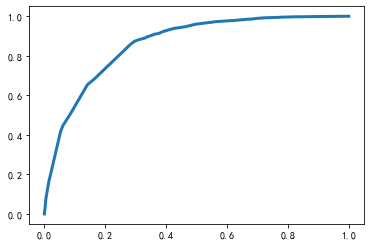

In [35]:
# ROC曲线 sklearn.metrics.roc_curve()
from sklearn.metrics import roc_curve, auc
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

probas_ = model.predict_proba(final_testDF1_x)
fpr, tpr, thresholds = roc_curve(final_testDF1_y, probas_[:, 1])
tprs.append(np.interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=3, alpha=1,
         label='ROC Curve (AUC = %0.2f)' % roc_auc)

### 下面进行决策树的练习

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree ,DecisionTreeRegressor

In [37]:
dataset_5_1=pd.concat([dataset_1,dataset_4.iloc[:,:-1]],axis=1)
dataset_5_1.columns

Index(['age', 'final_weight', 'education_num', 'capital_gain', 'capital_loss',
       'hours_perweek', 'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander',
       'race_ Black', 'race_ Other',
       ...
       'native_country_ Puerto-Rico', 'native_country_ Scotland',
       'native_country_ South', 'native_country_ Taiwan',
       'native_country_ Thailand', 'native_country_ Trinadad&Tobago',
       'native_country_ United-States', 'native_country_ Vietnam',
       'native_country_ Yugoslavia', 'sex'],
      dtype='object', length=103)

In [38]:
trainDF1_x=dataset_5_1.iloc[:30168,:]
trainDF1_y=dataset_4.Income[:30168]
testDF1_x=dataset_5_1.iloc[30168:,:]
testDF1_y=dataset_4.Income[30168:]
print(trainDF1_x.shape)
print(testDF1_x.shape)
print(testDF1_x.columns)

(30168, 103)
(15054, 103)
Index(['age', 'final_weight', 'education_num', 'capital_gain', 'capital_loss',
       'hours_perweek', 'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander',
       'race_ Black', 'race_ Other',
       ...
       'native_country_ Puerto-Rico', 'native_country_ Scotland',
       'native_country_ South', 'native_country_ Taiwan',
       'native_country_ Thailand', 'native_country_ Trinadad&Tobago',
       'native_country_ United-States', 'native_country_ Vietnam',
       'native_country_ Yugoslavia', 'sex'],
      dtype='object', length=103)


In [39]:
# 3、使用信息熵作为划分标准，对决策树进行训练
clf = DecisionTreeClassifier(criterion='entropy',max_depth=10)
print(clf)
clf.fit(trainDF1_x, trainDF1_y)

DecisionTreeClassifier(criterion='entropy', max_depth=10)


DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [40]:
print(clf.feature_importances_)


[7.29143814e-02 1.49730621e-02 1.81566434e-01 1.87203285e-01
 5.95904484e-02 3.79321055e-02 0.00000000e+00 8.38402564e-04
 2.45386769e-03 0.00000000e+00 2.57450507e-04 6.16588323e-04
 1.84975505e-03 2.51188020e-03 1.16718539e-03 4.47417932e-03
 4.08881806e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.27719335e-04
 0.00000000e+00 2.60959900e-04 5.27961096e-04 0.00000000e+00
 0.00000000e+00 6.46504724e-03 8.19287787e-04 8.41665399e-04
 0.00000000e+00 5.59777110e-04 5.77377327e-04 1.25969840e-03
 3.78747471e-01 0.00000000e+00 6.96915887e-04 0.00000000e+00
 5.26446302e-04 1.11432278e-03 0.00000000e+00 4.20520336e-04
 9.35454950e-03 2.37949059e-03 0.00000000e+00 3.95411177e-04
 3.25841654e-03 0.00000000e+00 5.63909247e-03 8.96561370e-04
 5.74232453e-04 4.41069169e-04 8.71563690e-04 0.00000000e+00
 9.43014302e-04 0.00000000e+00 0.00000000e+00 5.96534048e-04
 4.67322215e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [41]:
from sklearn.metrics import accuracy_score
pred_model = clf.predict(trainDF1_x)
print('Accuracy of the model to train_data is {:.0%}'.format(accuracy_score(trainDF1_y, pred_model)))

Accuracy of the model to train_data is 86%


In [42]:
pred_model = clf.predict(testDF1_x)
print('Accuracy of the model to test_data is {:.0%}'.format(accuracy_score(testDF1_y, pred_model)))

Accuracy of the model to test_data is 86%


在我自己选择树深度的时候，当我把max_depth定为10的时候，训练数据的模型准确率为0.86，而测试数据的准确率为0.86；当我把max_depth定为15的时候，训练数据的模型准确率为0.89，而测试数据的准确率为0.84,出现了过拟合现象


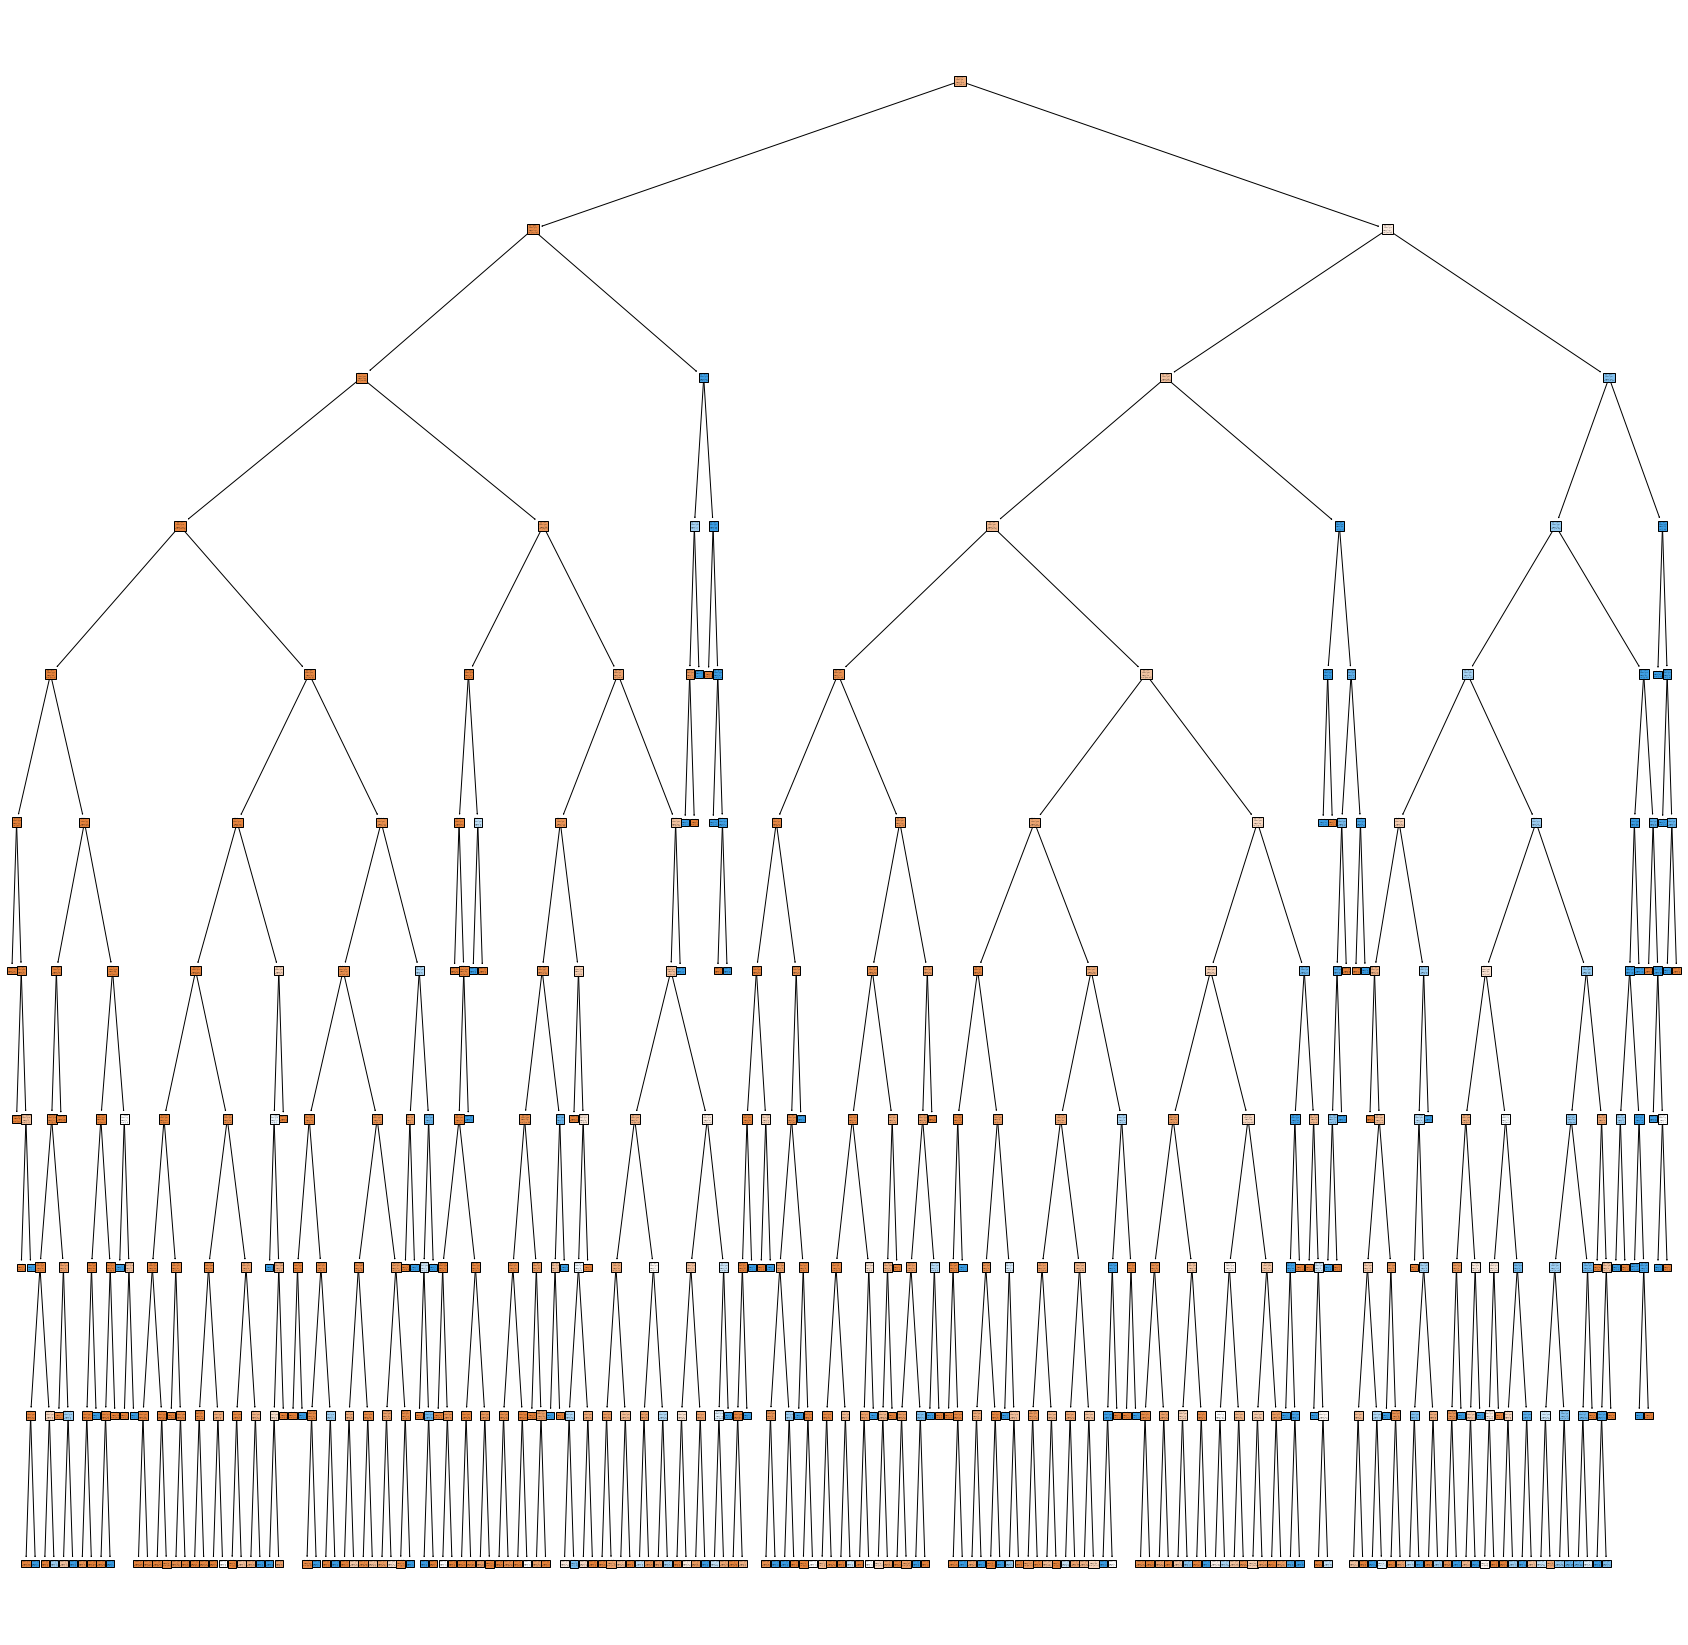

In [81]:
from sklearn.tree import plot_tree
plot_tree(clf, filled=True)
#plt.rcParams['figure.figsize'] = (30,30) 
#plt.savefig(r'C:\Users\pc\Desktop\决策树.jpg',dpi=400*300)
plt.show()


In [82]:
import Graphviz as graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 
dot_data = tree.export_graphviz(clf, out_file=None,
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  


In [83]:
graph.render(view=True, format="jpg", filename=r'C:\Users\pc\Desktop\decisiontree_pdf')

'C:\\Users\\pc\\Desktop\\decisiontree_pdf.jpg'

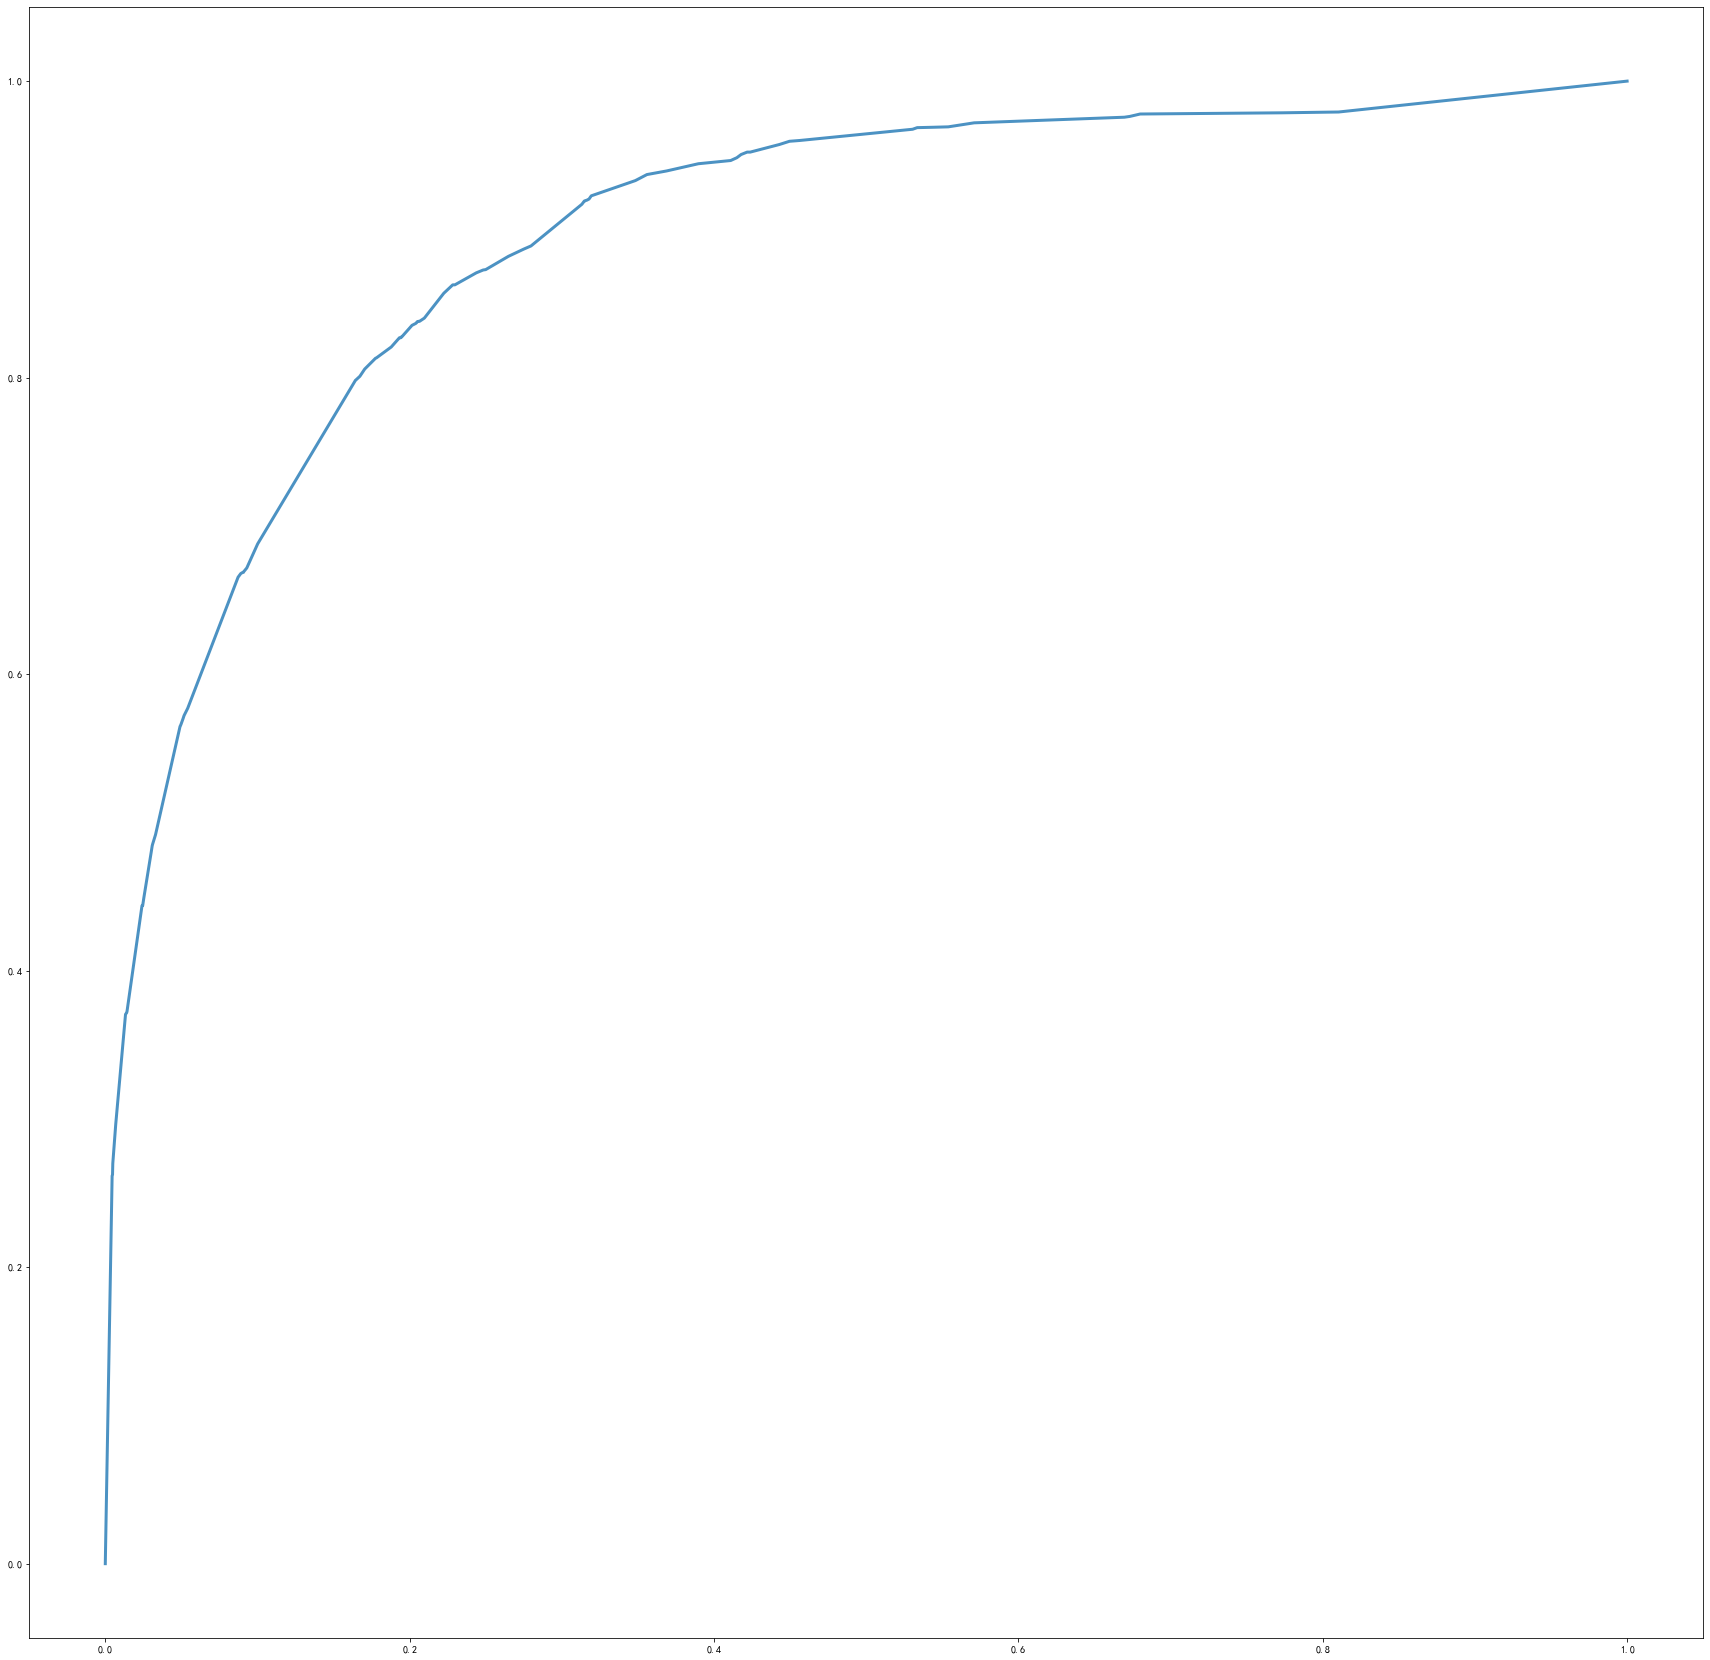

In [32]:
# ROC曲线 sklearn.metrics.roc_curve()
from sklearn.metrics import roc_curve, auc
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

probas_ = clf.predict_proba(testDF1_x)
fpr, tpr, thresholds = roc_curve(testDF1_y, probas_[:, 1])
tprs.append(np.interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=3, alpha=0.8,
         label='ROC Curve (AUC = %0.2f)' % roc_auc)

### 朴素贝叶斯

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

x_train,y_train=trainDF1_x,trainDF1_y
x_test,y_test=testDF1_x,testDF1_y


In [36]:
mlt = MultinomialNB(alpha=1.0)
mlt.fit(x_train, y_train)
y_predict = mlt.predict(x_test)
print("准确率为：", mlt.score(x_test, y_test))
print("每个类别的精确率和召回率：\n", classification_report(y_test, y_predict, target_names=['<=50K','>50K']))


准确率为： 0.7771356450112927
每个类别的精确率和召回率：
               precision    recall  f1-score   support

       <=50K       0.79      0.95      0.87     11357
        >50K       0.62      0.23      0.34      3697

    accuracy                           0.78     15054
   macro avg       0.71      0.59      0.60     15054
weighted avg       0.75      0.78      0.74     15054



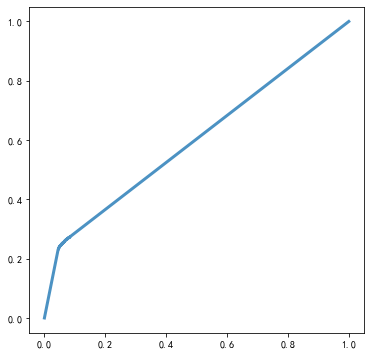

In [53]:
# ROC曲线 sklearn.metrics.roc_curve()
from sklearn.metrics import roc_curve, auc
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

probas_ = mlt.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
tprs.append(np.interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, lw=3, alpha=0.8,
         label='ROC Curve (AUC = %0.2f)' % roc_auc)

### 交叉验证决策树

In [45]:
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
# 采用交叉验证的方式训练模型
cv = StratifiedKFold(n_splits=5)
clf = DecisionTreeClassifier(criterion='entropy',max_depth=10)


In [46]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
X=pd.concat([MSDF,relationshipDF,sexDF,educationDF],axis=1)
y=dataset_4.Income

# 统计每次结果，并绘制相应的ROC曲线
i = 0
for train, test in cv.split(X, y):
    probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

# 计算平均结果，绘制平均ROC曲线
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

# 将均值线上下一个标准差内的区域上色
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

KeyError: "None of [Int64Index([ 9008,  9009,  9013,  9014,  9015,  9016,  9017,  9018,  9021,\n             9022,\n            ...\n            45212, 45213, 45214, 45215, 45216, 45217, 45218, 45219, 45220,\n            45221],\n           dtype='int64', length=36177)] are in the [columns]"

## 2. 聚类练习
对预处理后的census_income数据集中除最后一列的所有特征选择不同模型进行聚类，并进行结果比较和解释。

In [38]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN,AgglomerativeClustering
from matplotlib import pyplot
from sklearn.metrics import homogeneity_completeness_v_measure,silhouette_score ,calinski_harabasz_score,davies_bouldin_score # 计算 轮廓系数，CH 指标，DBI 


DBSCAN

In [39]:
DBS_model=DBSCAN(eps=0.3,min_samples=9)
yhat=DBS_model.fit_predict(x_test)

层次聚类

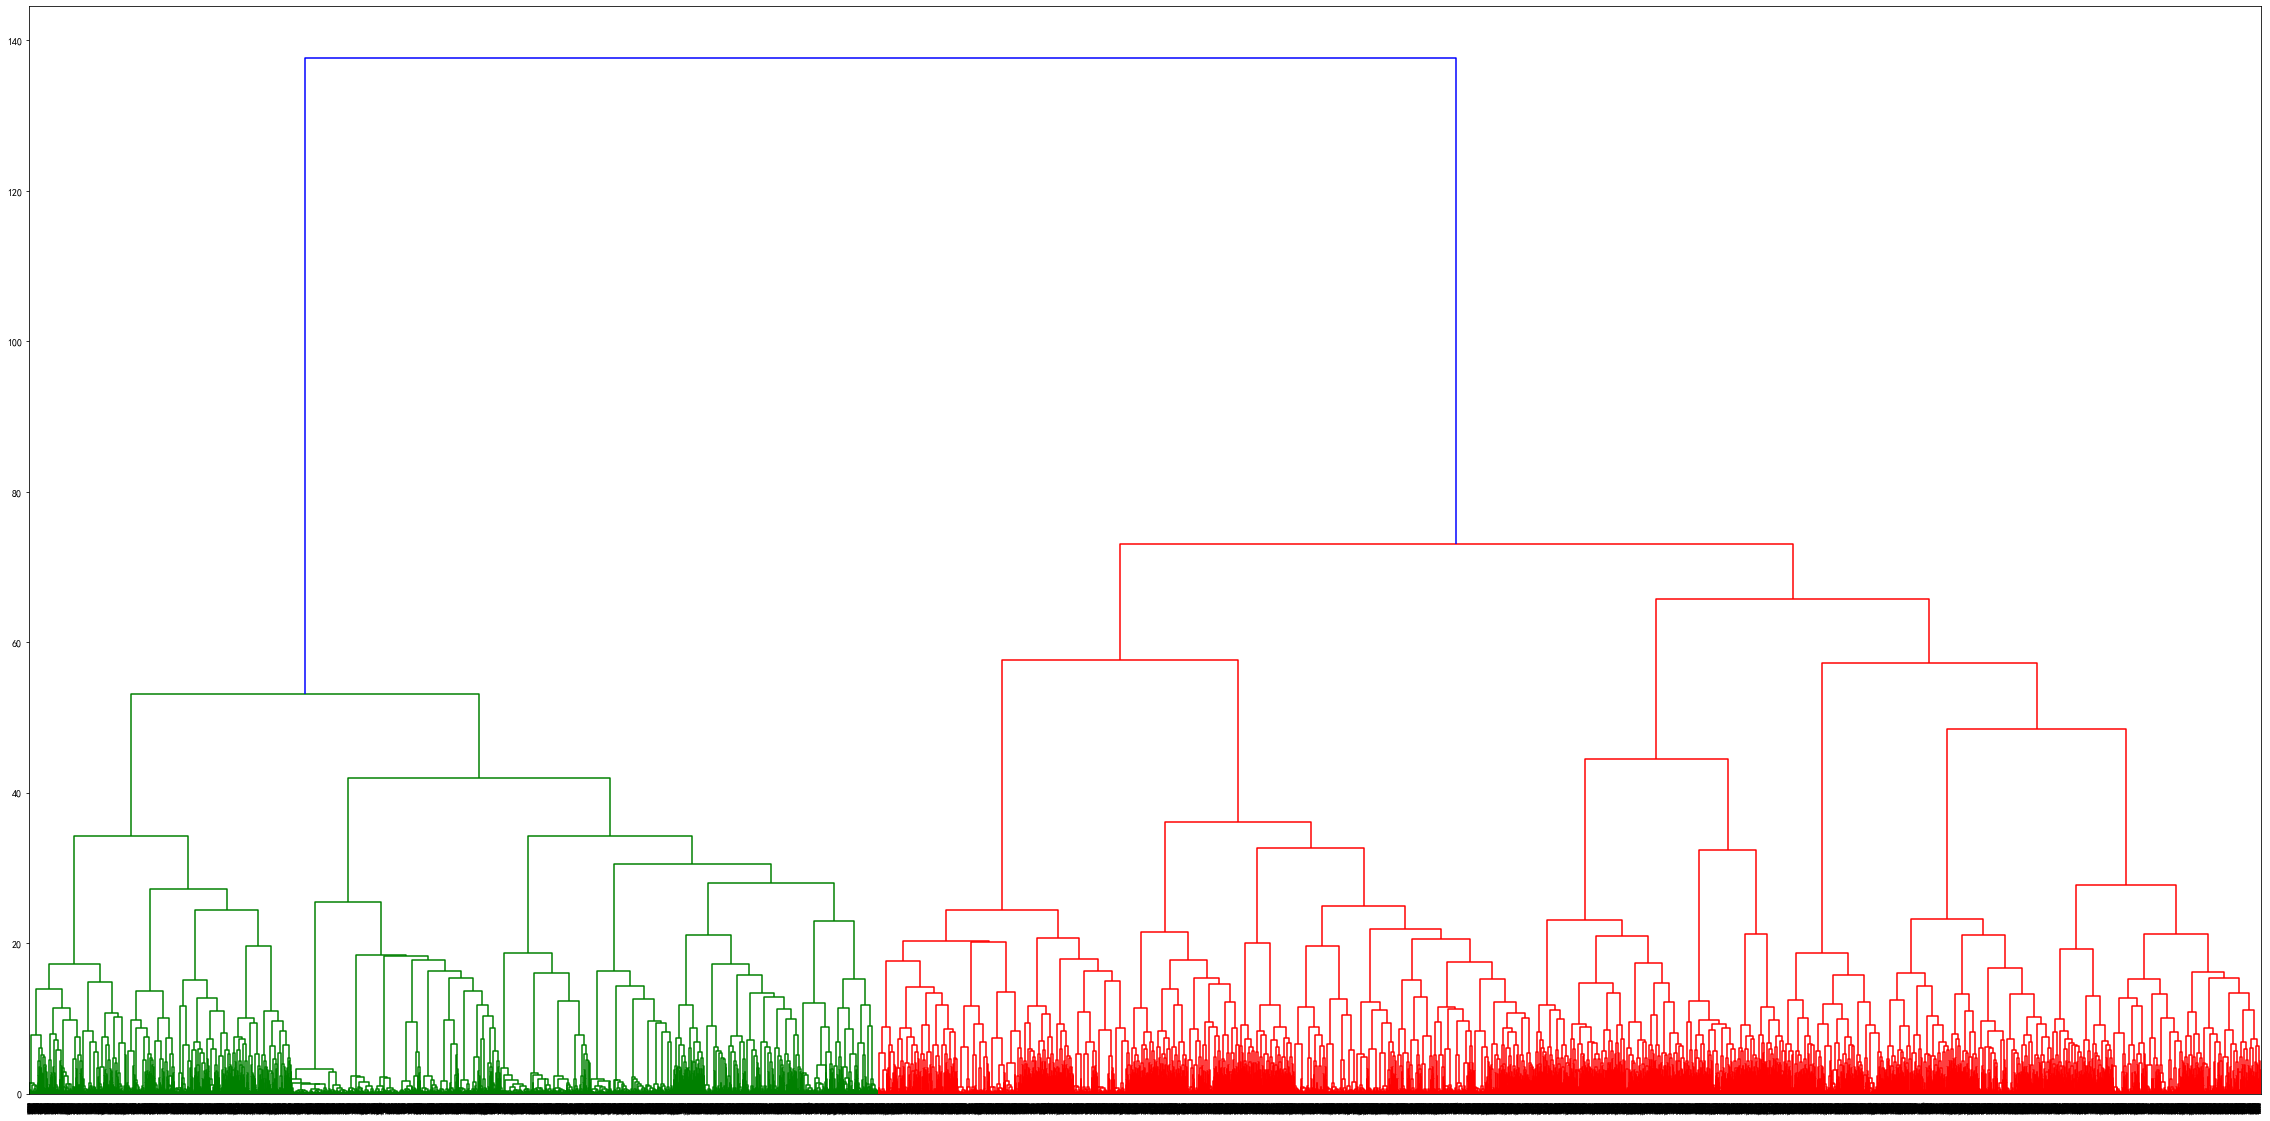

In [40]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import MinMaxScaler
plt.figure(figsize=(40,20))

def drawc():
   df = MinMaxScaler().fit_transform(x_test)
   ss = linkage(df, method="ward")
   dendrogram(ss)
   plt.show()

drawc()


In [41]:
Agg_model=AgglomerativeClustering(distance_threshold=0,n_clusters=None)

In [42]:
labels = DBS_model.labels_
davies_bouldin_score(x_test, labels)
#只得到了一个标签。。

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
res_Agg=Agg_model.fit_predict(x_test)
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
plot_dendrogram(res_Agg, truncate_mode='level', p=3)
plt.show()


### 3. 关联规则练习
利用data_generater读取“store_data.csv”并进行关联规则挖掘，找出支持度不小于0.0045，置信度不小于0.2的关联规则，并对结果进行解释。

In [43]:
from efficient_apriori import apriori
df=pd.read_csv(r'C:\Users\pc\Desktop\4-机器学习-code\store_data.csv',header=None,sep=',')


In [44]:
list1=[[] for i in range(7501)]
for i in range(7501):
    for j in range(20):
        if  not df.iloc[i,j] is np.nan:
            list1[i].append(df.iloc[i,j])
    list1[i]=tuple(list1[i])

In [45]:
df.head()
list1

[('shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'),
 ('burgers', 'meatballs', 'eggs'),
 ('chutney',),
 ('turkey', 'avocado'),
 ('mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'),
 ('low fat yogurt',),
 ('whole wheat pasta', 'french fries'),
 ('soup', 'light cream', 'shallot'),
 ('frozen vegetables', 'spaghetti', 'green tea'),
 ('french fries',),
 ('eggs', 'pet food'),
 ('cookies',),
 ('turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'),
 ('spaghetti', 'champagne', 'cookies'),
 ('mineral water', 'salmon'),
 ('mineral water',),
 ('shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'),
 ('turkey', 'eggs'),
 ('turkey',
  'fresh tuna',
  'tomatoes',
  '

In [46]:
itemsets, rules = apriori(list1, min_support=0.0045,  min_confidence=0.2)


#### 按提升度对结果进行排序并显示前10条


In [48]:
result1 = sorted(rules, key=lambda rule: rule.lift,reverse=True)
for rule in result1[:10]:
    print(rule)

{light cream} -> {chicken} (conf: 0.291, supp: 0.005, lift: 4.844, conv: 1.325)
{pasta} -> {escalope} (conf: 0.373, supp: 0.006, lift: 4.701, conv: 1.468)
{pasta} -> {shrimp} (conf: 0.322, supp: 0.005, lift: 4.507, conv: 1.370)
{whole wheat pasta} -> {olive oil} (conf: 0.271, supp: 0.008, lift: 4.122, conv: 1.282)
{herb & pepper, spaghetti} -> {ground beef} (conf: 0.393, supp: 0.006, lift: 4.004, conv: 1.487)
{herb & pepper, mineral water} -> {ground beef} (conf: 0.391, supp: 0.007, lift: 3.976, conv: 1.480)
{tomato sauce} -> {ground beef} (conf: 0.377, supp: 0.005, lift: 3.841, conv: 1.448)
{mushroom cream sauce} -> {escalope} (conf: 0.301, supp: 0.006, lift: 3.791, conv: 1.317)
{frozen vegetables, spaghetti} -> {tomatoes} (conf: 0.239, supp: 0.007, lift: 3.498, conv: 1.225)
{mineral water, soup} -> {olive oil} (conf: 0.225, supp: 0.005, lift: 3.423, conv: 1.206)


In [49]:
for rule in result1[-10:]:
    print(rule)

{chocolate, french fries} -> {mineral water} (conf: 0.248, supp: 0.009, lift: 1.041, conv: 1.013)
{strawberries} -> {mineral water} (conf: 0.237, supp: 0.005, lift: 0.996, conv: 0.999)
{burgers, french fries} -> {mineral water} (conf: 0.236, supp: 0.005, lift: 0.992, conv: 0.997)
{green tea} -> {mineral water} (conf: 0.235, supp: 0.031, lift: 0.986, conv: 0.996)
{parmesan cheese} -> {mineral water} (conf: 0.235, supp: 0.005, lift: 0.985, conv: 0.995)
{light mayo} -> {mineral water} (conf: 0.230, supp: 0.006, lift: 0.967, conv: 0.990)
{escalope} -> {mineral water} (conf: 0.215, supp: 0.017, lift: 0.902, conv: 0.970)
{french fries, green tea} -> {mineral water} (conf: 0.215, supp: 0.006, lift: 0.902, conv: 0.970)
{energy drink} -> {mineral water} (conf: 0.210, supp: 0.006, lift: 0.881, conv: 0.964)
{yogurt cake} -> {mineral water} (conf: 0.205, supp: 0.006, lift: 0.860, conv: 0.958)
